# Visualiser les résultats RLLIB

3 composants principaux:

- **Traçage des récompenses**

- **Replay de la politique** via SUMO

- **Collecte et Analyse des données**: création de `emission.csv` (vitesse, la position, le temps, la consommation de carburant)à ouvrir et lire avec la *bibliothèque csv* de Python ou en utilisant Excel.

## 2.1 - Utiliser SUMO sans entrainement

_pas de récompense à plot et pas de policy à replay._

### Collecte et Analyse des données

D'abord, on dit à SUMO de générer les fichiers `emission.xml` en spécifiant `emission_path` dans les paramètres de simulation (classe `SumoParams`).

Ensuite, on dit à Flow de convertir ces fichiers d'émission XML en fichiers CSV avec `convert_to_csv = True` à la méthode `run`

Lors de l'exécution des expériences, Flow créera désormais automatiquement des fichiers CSV à côté des fichiers XML générés par SUMO.

```python
sim_params = SumoParams(sim_step=0.1, render=True, emission_path='data')
exp.run(1, convert_to_csv=True)
```

## 2.2 - Utiliser SUMO avec RLlib 

### Traçage des récompenses

**Tensorboard**

On utilise `tensorboard` avec le paramètre `--logdir`(répertoire de résultats RLlib) situé par défaut dans le répertoire `~/ray_results`. .

`tensorboard --logdir ~/ray_results/experiment_dir/result/directory`

ou `tensorboard --logdir ~/ray_results` pour sélectionner plusieurs répertoire d'expérience.

**plot_ray_results.py**

Il prend en argument:

- le chemin d'accès au fichier `progress.csv` situé à l'intérieur de votre répertoire de résultats (`~/ray_results/...`)
- les noms des colonnes qu'on souhaite tracer (récompense ou autre).

Par exemple :

`flow/visualize/plot_ray_results.py ~/ray_results/experiment_dir/result/progress.csv training/return-average training/return-min`

Si on ne spécifie pas les noms des colonnes alors toutes les colonnes disponibles seront affichées.

### Policy Replay

**visualizer_rllib.py**

Il prend en argument :

 - le chemin d'accès aux résultats (par défaut, `~/ray_results`)
 - le nombre de checkpoint qu'on veut visualiser (dossier `checkpoint_<number>` dans le répertoir de résultats).

Par exemple:

`python flow/visualize/visualizer_rllib.py ~/ray_results/experiment_dir/result/directory 1`

Il existe d'autres paramètres optionels `visualizer_rllib.py --help`. 

### Collecte et Analyse des données

Les données de simulation peuvent être générées de la même manière qu'elles le sont sans entrainement en ajoutant le paramètre `--gen-emission`.

`python flow/visualize/visualizer_rllib.py ~/ray_results/experiment_dir/result/directory 1 --gen_emission`

## 2.3 - Example

In [2]:
!pwd  # make sure you are in the flow/tutorials folder

/home/julien/Documents/flow/tutorials


In [3]:
!python ../flow/visualize/plot_ray_results.py data/trained_ring/progress.csv

Columns are: episode_reward_max, episode_reward_min, episode_reward_mean, episode_len_mean, episodes_this_iter, timesteps_this_iter, done, timesteps_total, episodes_total, training_iteration, experiment_id, date, timestamp, time_this_iter_s, time_total_s, pid, hostname, node_ip, time_since_restore, timesteps_since_restore, iterations_since_restore, num_healthy_workers, trial_id, sampler_perf/mean_env_wait_ms, sampler_perf/mean_processing_ms, sampler_perf/mean_inference_ms, info/num_steps_trained, info/num_steps_sampled, info/sample_time_ms, info/load_time_ms, info/grad_time_ms, info/update_time_ms, perf/cpu_util_percent, perf/ram_util_percent, info/learner/default_policy/cur_kl_coeff, info/learner/default_policy/cur_lr, info/learner/default_policy/total_loss, info/learner/default_policy/policy_loss, info/learner/default_policy/vf_loss, info/learner/default_policy/vf_explained_var, info/learner/default_policy/kl, info/learner/default_policy/entropy, info/learner/default_policy/entropy_c

<IPython.core.display.Javascript object>


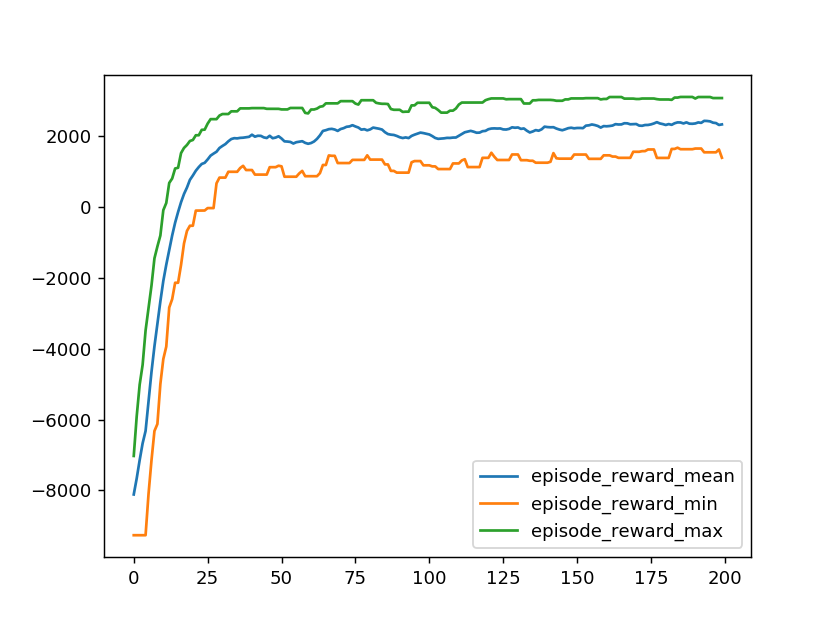

In [4]:
# if this doesn't display anything, try with "%matplotlib inline" instead
%run ../flow/visualize/plot_ray_results.py data/trained_ring/progress.csv episode_reward_mean episode_reward_min episode_reward_max

**Utilisation de SUMO**

In [5]:
!python ../flow/visualize/visualizer_rllib.py data/trained_ring 200 --horizon 2000

2020-03-18 17:38:47,013	INFO node.py:498 -- Process STDOUT and STDERR is being redirected to /tmp/ray/session_2020-03-18_17-38-47_013049_9311/logs.
2020-03-18 17:38:47,154	INFO services.py:409 -- Waiting for redis server at 127.0.0.1:60741 to respond...
2020-03-18 17:38:47,282	INFO services.py:409 -- Waiting for redis server at 127.0.0.1:43906 to respond...
2020-03-18 17:38:47,289	INFO services.py:809 -- Starting Redis shard with 2.09 GB max memory.
2020-03-18 17:38:47,364	INFO node.py:512 -- Process STDOUT and STDERR is being redirected to /tmp/ray/session_2020-03-18_17-38-47_013049_9311/logs.
2020-03-18 17:38:47,367	INFO services.py:1475 -- Starting the Plasma object store with 3.14 GB memory using /dev/shm.
2020-03-18 17:38:47,673	ERROR log_sync.py:34 -- Log sync requires cluster to be setup with `ray up`.
2020-03-18 17:38:47,852	WARNING ppo.py:143 -- FYI: By default, the value function will not share layers with the policy model ('vf_share_layers': False).
2020-03-18 17:38:49,843	I

That's it for this example! Feel free to play around with the other scripts in `flow/visualize`. Run them with the `--help` parameter and it should tell you how to use it. Also, if you need the emission file for the trained ring, you can obtain it by running the following command:

In [7]:
!python ../flow/visualize/visualizer_rllib.py data/trained_ring 200 --horizon 2000 --gen_emission

2020-03-18 17:47:37,675	INFO node.py:498 -- Process STDOUT and STDERR is being redirected to /tmp/ray/session_2020-03-18_17-47-37_675248_10153/logs.
2020-03-18 17:47:37,812	INFO services.py:409 -- Waiting for redis server at 127.0.0.1:26304 to respond...
2020-03-18 17:47:37,932	INFO services.py:409 -- Waiting for redis server at 127.0.0.1:58340 to respond...
2020-03-18 17:47:37,936	INFO services.py:809 -- Starting Redis shard with 2.09 GB max memory.
2020-03-18 17:47:38,004	INFO node.py:512 -- Process STDOUT and STDERR is being redirected to /tmp/ray/session_2020-03-18_17-47-37_675248_10153/logs.
2020-03-18 17:47:38,008	INFO services.py:1475 -- Starting the Plasma object store with 3.14 GB memory using /dev/shm.
2020-03-18 17:47:38,897	ERROR log_sync.py:34 -- Log sync requires cluster to be setup with `ray up`.
2020-03-18 17:47:39,298	WARNING ppo.py:143 -- FYI: By default, the value function will not share layers with the policy model ('vf_share_layers': False).
2020-03-18 17:47:43,466

The path where the emission file is generated will be outputted at the end of the simulation.